<a href="https://colab.research.google.com/github/ranzan97/Exploratory-Data-Analysis/blob/main/Iris_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [20]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

In [21]:
# Convert the dataset into a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [22]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [24]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


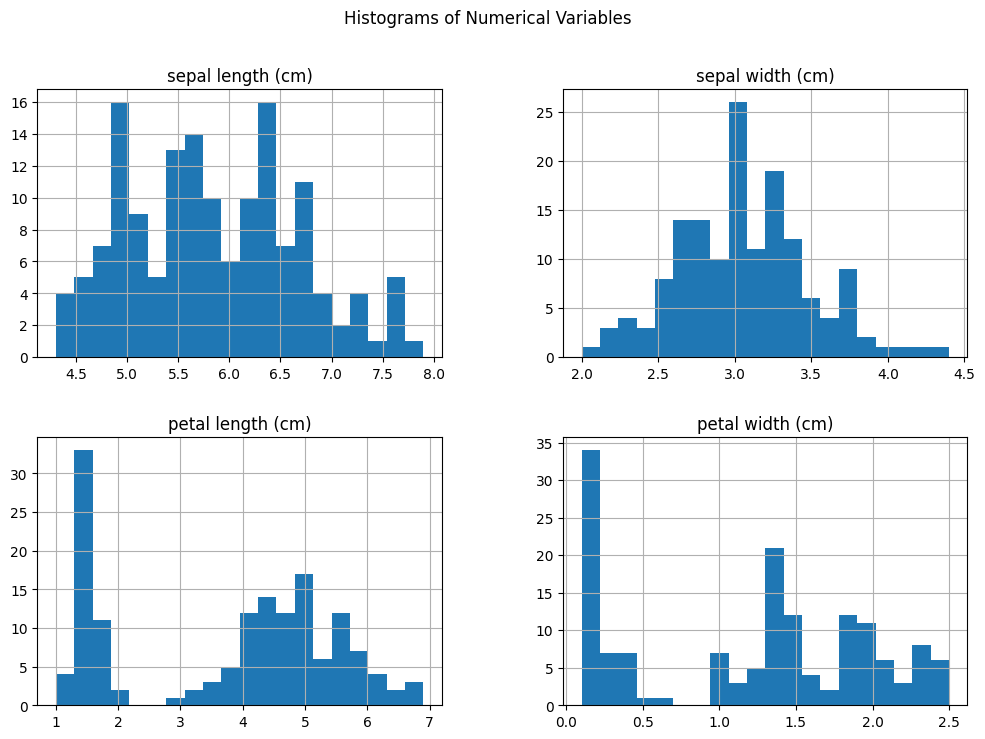

In [26]:
# Histograms for numerical variables
iris_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

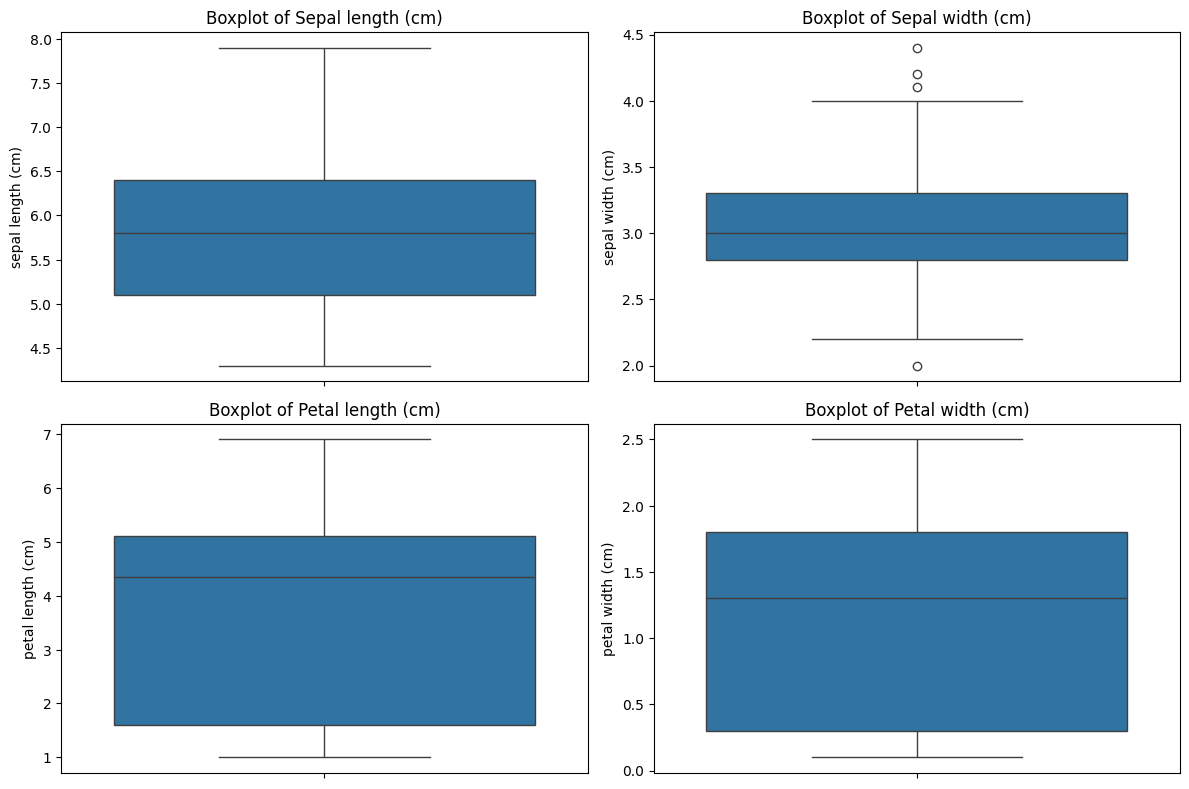

In [27]:
# Boxplots for numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=iris_df, y=col)
    plt.title(f"Boxplot of {col.capitalize()}")

plt.tight_layout()
plt.show()

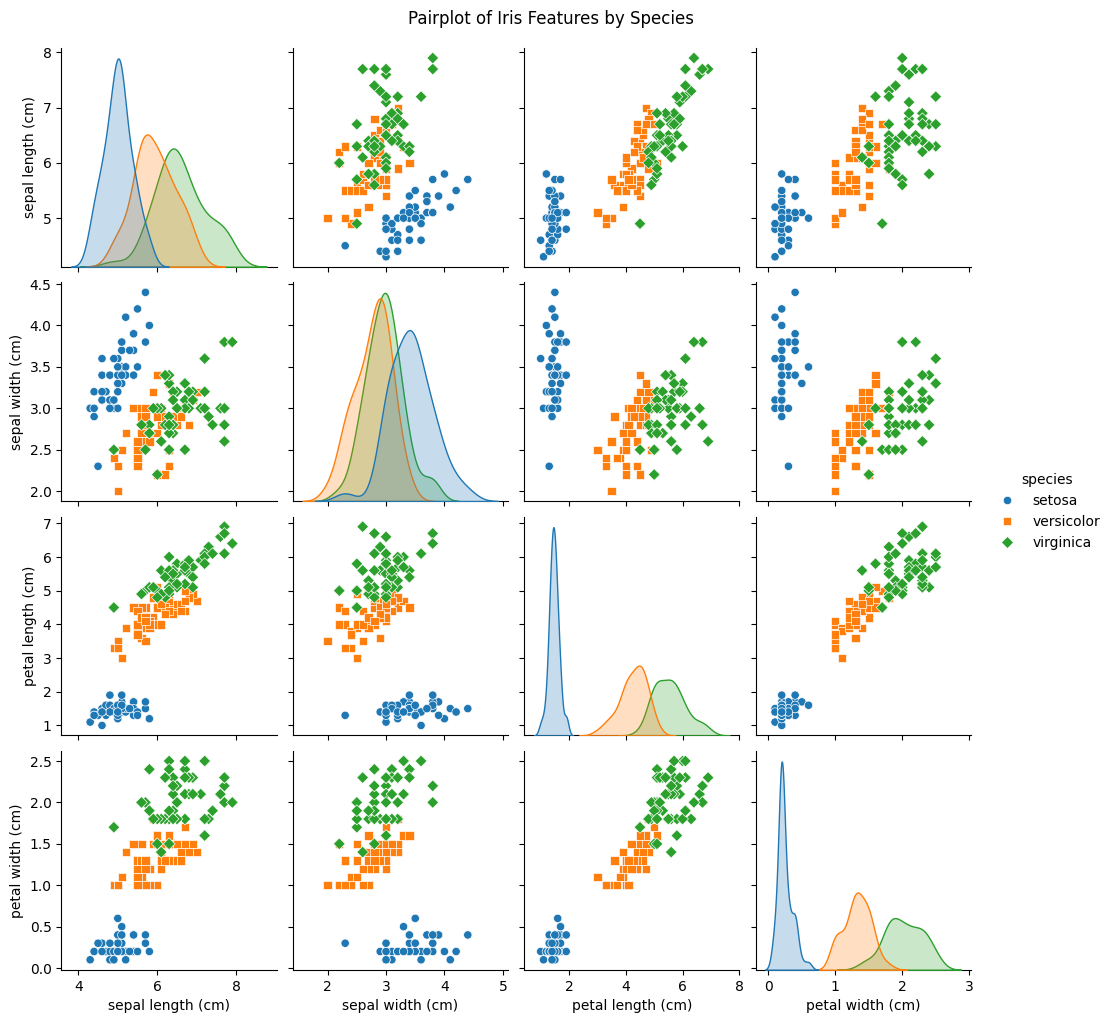

In [28]:
# Pairplot for all features, colored by species
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

In [30]:
# Exclude the 'species' column when calculating the correlation matrix
correlation_matrix = iris_df.drop(columns=['species']).corr()

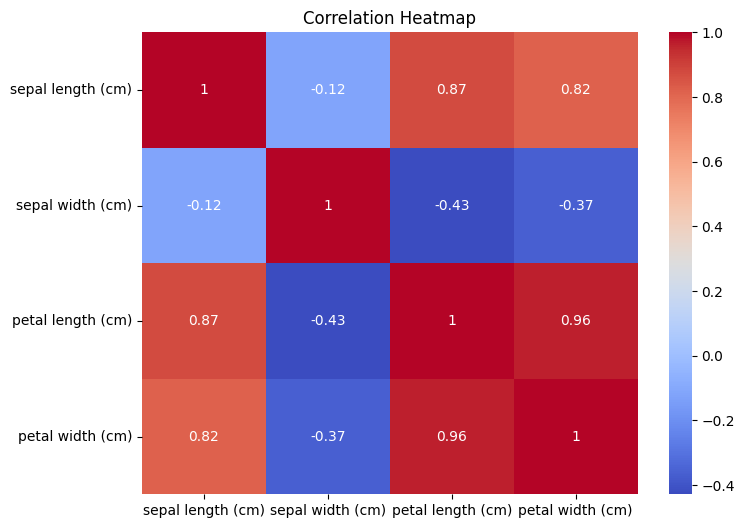

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

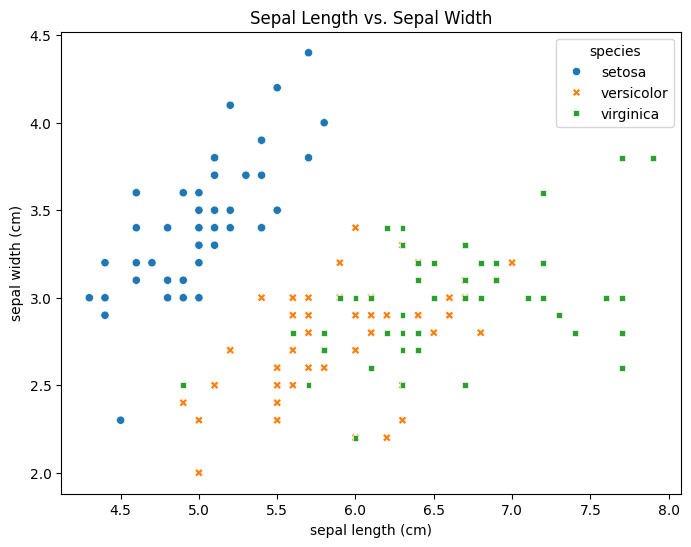

In [32]:
# Scatter plot of sepal length vs. sepal width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species')
plt.title("Sepal Length vs. Sepal Width")
plt.show()

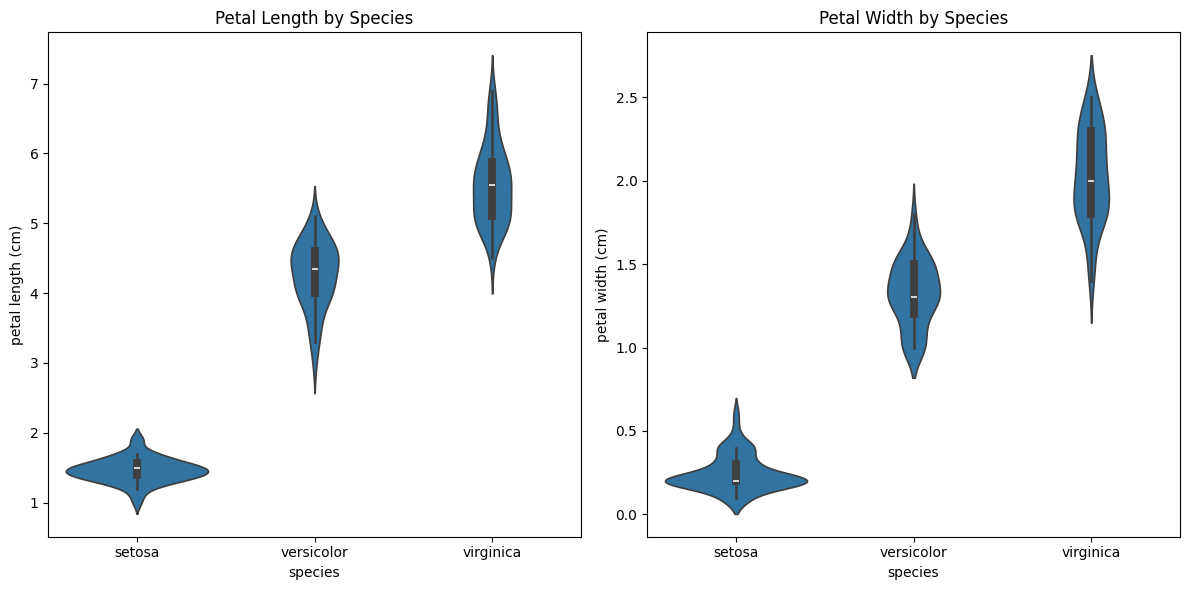

In [33]:
# Violin plots of petal length and width by species
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=iris_df, x='species', y='petal length (cm)')
plt.title("Petal Length by Species")

plt.subplot(1, 2, 2)
sns.violinplot(data=iris_df, x='species', y='petal width (cm)')
plt.title("Petal Width by Species")

plt.tight_layout()
plt.show()

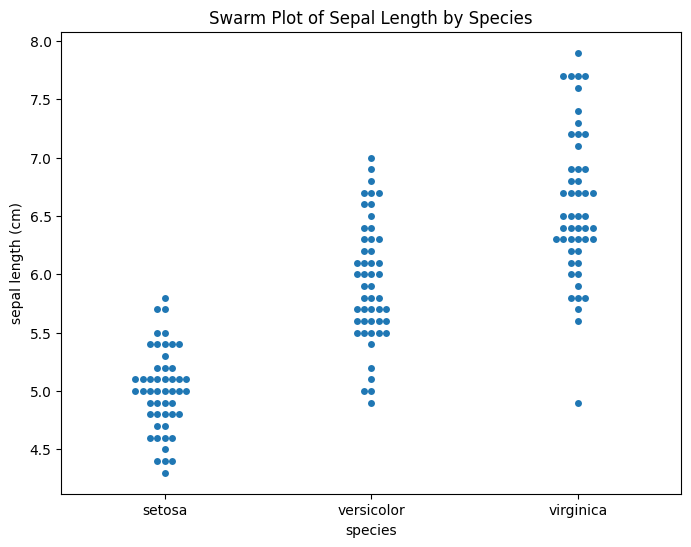

In [34]:
# Swarm plot of sepal length by species
plt.figure(figsize=(8, 6))
sns.swarmplot(data=iris_df, x='species', y='sepal length (cm)')
plt.title("Swarm Plot of Sepal Length by Species")
plt.show()